# Downloading Data from drive

In [1]:
# Custom made Data
!gdown https://drive.google.com/uc?id=1BfazLmXpnCOEL3a9rXuDLS04CQrGBZSb

Downloading...
From: https://drive.google.com/uc?id=1BfazLmXpnCOEL3a9rXuDLS04CQrGBZSb
To: /content/new_classification_data.csv
100% 6.03M/6.03M [00:00<00:00, 113MB/s]


In [2]:
# Stop words
# credit -> Kushal Paudyal (https://github.com/sanjaalcorps/NepaliStopWords)
!gdown https://drive.google.com/uc?id=1rut_6tJVxvhW2sos425LGNbOb0RCNXmc

Downloading...
From: https://drive.google.com/uc?id=1rut_6tJVxvhW2sos425LGNbOb0RCNXmc
To: /content/NepaliStopWords.zip
100% 2.21k/2.21k [00:00<00:00, 5.78MB/s]


In [3]:
!unzip /content/NepaliStopWords.zip

Archive:  /content/NepaliStopWords.zip
   creating: NepaliStopWords/
  inflating: NepaliStopWords/NepaliStopWords.txt  


In [4]:
# library for nepali text pre-processing
# credit -> prabash jha (https://github.com/prabhashj07/nepalikit)
!pip install nepalikit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00


# Importing necessary libraries

In [5]:
import pandas as pd
import sys
import re
import sklearn
from sklearn.model_selection import train_test_split
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nepalikit.tokenization import Tokenizer
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from nepalikit.preprocessing import TextProcessor
from nepalikit.manage_stopwords import load_stopwords, remove_stopwords_from_text

In [6]:
print('Python version:',sys.version)
print('Pandas version:',pd.__version__)
print('Pytorch version:', torch.__version__)
print('Sklearn version:',sklearn.__version__)

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Pandas version: 2.1.4
Pytorch version: 2.4.1+cu121
Sklearn version: 1.5.2


# Data Pre processing

In [7]:
processor = TextProcessor()

stopwords_path = '/content/NepaliStopWords'
stopwords = load_stopwords(stopwords_path)

def preprocess_text(text):

    # Removing html tags
    text = processor.remove_html_tags(text)
    # Removing special characters
    text = processor.remove_special_characters(text)
    # Replacing '\n' with emty space
    text = re.sub('\n', ' ', text)
    # Removing digits
    text = re.sub(r'[\d०१२३४५६७८९]', '', text)
    # Remove English texts
    text = re.sub(r'\b[a-zA-Z]+\b', '', text)

    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    # Removing short words (less than 3 characters)
    filtered_words = [word for word in filtered_words if len(word) > 2]
    return ' '.join(filtered_words)

initial_dataset = pd.read_csv("/content/new_classification_data.csv")

# Applying preprocessing function
initial_dataset['data'] = initial_dataset['data'].apply(preprocess_text)

# Removing duplicates and NAN values
initial_dataset.drop_duplicates(inplace=True)
initial_dataset.dropna(inplace=True)

# Encoding class labels
label_encoder = LabelEncoder()
initial_dataset['label'] = label_encoder.fit_transform(initial_dataset['label'])
num_classes = len(label_encoder.classes_)

# Data Preparation and Sanity checks

In [8]:
train_dataset, validation_dataset = train_test_split(initial_dataset, test_size=0.2, random_state=42)

In [9]:
print(f"Length of training dataset: {len(train_dataset)}")
print(f"Length of validation dataset: {len(validation_dataset)}")

Length of training dataset: 1561
Length of validation dataset: 391


In [10]:
train_dataset.head(5)

,data,label
585,विभिन्न विश्वविद्यालय विद्यालय तहका वार्षिक पर...,3
1703,भन्नाले प्राविधिक शिक्षा व्यावसायिक्र तालीम पर...,2
1464,नेपाल सरकार गृह मन्त्रालय जिल्ला प्रशासन कार्य...,1
978,प्रेस विज्ञप्ति मिति नाफाबाट परिपूर्ति व्यवस्थ...,3
1982,सरकारी वकील सम्बन्धी नियमावली नेपाल राजपत्रमा ...,2


In [11]:
train_dataset['data'][0]

'चौधरी फाउण्डेसनद्वारा विद्यालयमा डिजिटल क्लासरूम विद्यालयमा शुद्ध खानेपानीको व्यवस्था काठमाडौं चौधरी फाउण्डेसनले विद्यालयमा डिजिटल क्लासरूमको अवधारणा कार्यान्वयनमा ल्याएको सूचना प्रविधिमा आधारित विश्वब्यापी अध्ययनअध्यापनको पहुँचमा नेपाली बालबालिका पुग्न सकून् सोंचका अवधारणा कार्यान्वयनमा ल्याइएको फाउण्डेसनले जनाएको चरणमा नवलपुरका सिन्धुपाल्चोकको विद्यालय डिजिटल क्लासरूम परियोजनाका छनौट नवलपुर देवचुली नगरपालिकास्थित शान्ति श्रृजना आधारभूत विद्यालय कावासोती नगरपालिकास्थित कालिका आधारभूत विद्यालय सिन्धुपाल्चोकको महाकाली माध्यमिक विद्यालय गिरानचौर छनौटमा परेको परियोजना अन्र्तगत चरणमा प्रत्येक विद्यालयले सातवटा ल्यापटप चारवटा डेक्सटप इन्चको एलजी टेलिभिजन प्रोजेक्टर प्राप्त डिजिटल क्लासरूमको विस्तारमा फाउण्डेसनले सहयोग जनाएको नवलपुरका विद्यालयमा स्थापित डिजिटल क्लास रूमको शनिवार छुट्टाछुट्टै उद्घाटन सीजीका अध्यक्ष एवं सांसद विनोद चौधरीले विश्वमा साक्षरताको परिभाषा परिवर्तन कम्प्युटर शिक्षा अंग्रेजी भाषाको ज्ञान व्यक्तिलाई साक्षर मान्ने प्रचलन विकास सरकारी विद्यालयबाट अभियान शुरू गरिएको जानक

In [12]:
encoded_label = train_dataset['label'][0]
class_name = label_encoder.inverse_transform([encoded_label])[0]

print(f"Class: {class_name}")

Class: Education


In [13]:
validation_dataset.head(5)

,data,label
1667,राजश्व न्यायाधिकरणमा रिक्त पदहरूका कार्यालयका ...,2
1458,नेपाल सरकार गृह मन्त्रालय जिल्ला प्रशासन कार्य...,1
1960,ग्र्ट उपनियम वमोजिम जम्मा रकम सम्वन्धित ठेकेदा...,2
1632,भन्सार नाकामा निरीक्षणः नियम बरमोजिम सम्वन्धित...,2
339,बल्खु त्रिभुवन विश्वविद्यालय विज्ञान प्रविधि अ...,0


In [14]:
print("Missing values in training dataset:")
print(train_dataset.isnull().sum())

print("Missing values in validation dataset:")
print(validation_dataset.isnull().sum())

Missing values in training dataset:
data     0
label    0
dtype: int64
Missing values in validation dataset:
data     0
label    0
dtype: int64


In [15]:
print("Data types in training dataset:")
print(train_dataset['data'].apply(type).value_counts())

print("Data types in validation dataset:")
print(validation_dataset['data'].apply(type).value_counts())

Data types in training dataset:
data
<class 'str'>    1561
Name: count, dtype: int64
Data types in validation dataset:
data
<class 'str'>    391
Name: count, dtype: int64


In [16]:
print("Number of duplicate rows in training dataset:")
print(train_dataset.duplicated().sum())

print("Number of duplicate rows in validation dataset:")
print(validation_dataset.duplicated().sum())

Number of duplicate rows in training dataset:
0
Number of duplicate rows in validation dataset:
0


In [17]:
print("Class distribution in training dataset:")
print(train_dataset['label'].value_counts())

print("Class distribution in validation dataset:")
print(validation_dataset['label'].value_counts())

Class distribution in training dataset:
label
1    407
3    398
2    396
0    360
Name: count, dtype: int64
Class distribution in validation dataset:
label
2    102
3    100
0     96
1     93
Name: count, dtype: int64


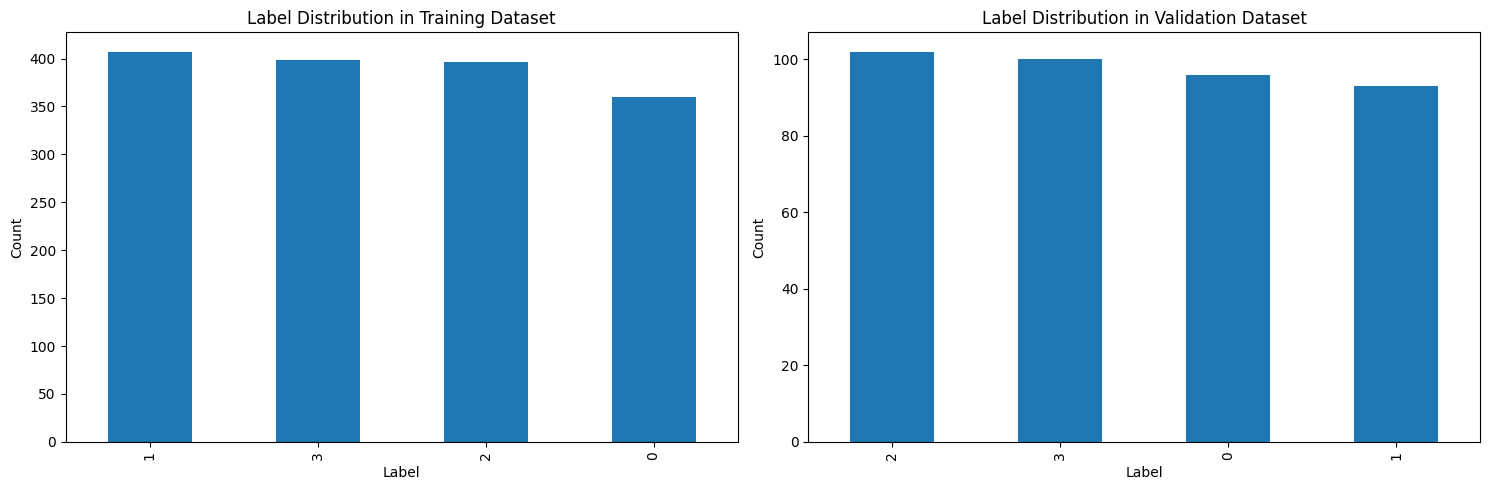

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

train_dataset['label'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Label Distribution in Training Dataset')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

validation_dataset['label'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Label Distribution in Validation Dataset')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

In [19]:
train_dataset['text_length'] = train_dataset['data'].apply(len)
print("Text length statistics in training dataset:")
print(train_dataset['text_length'].describe())

Text length statistics in training dataset:
count    1561.000000
mean      799.502242
std       547.218858
min         0.000000
25%       406.000000
50%       635.000000
75%       972.000000
max      5354.000000
Name: text_length, dtype: float64


There are 357 text samples in the training dataset.
The average length of the text samples is 673.
388 dispersion from mean.
The shortest text length in the train set is 105.
The longest text length in the train set is 2442.

In [20]:
validation_dataset['text_length'] = validation_dataset['data'].apply(len)
print("Text length statistics in validation dataset:")
print(validation_dataset['text_length'].describe())

Text length statistics in validation dataset:
count     391.000000
mean      812.554987
std       555.316649
min       185.000000
25%       412.000000
50%       682.000000
75%       970.500000
max      5941.000000
Name: text_length, dtype: float64


# Tokenizer and vocabulary

In [21]:
# Custom tokenizer using nepalikit
tokenizer = Tokenizer()

class CustomTokenizer:
    def __init__(self, tokenizer, vocab=None):
        self.tokenizer = tokenizer
        self.vocab = vocab if vocab else {}

    def build_vocab(self, texts):
        # 0 and 1 index will be used for reserved tokens
        index = 2
        self.vocab['<PAD>'] = 0
        self.vocab['<UNK>'] = 1
        for text in texts:
            tokens = self.tokenizer.tokenize(text, level = 'word')
            for token in tokens:
                if token not in self.vocab:
                    self.vocab[token] = index
                    index += 1

    def encode(self, text, max_length):
        tokens = self.tokenizer.tokenize(text)
        token_ids = [self.vocab.get(token, self.vocab['<UNK>']) for token in tokens]
        # Padding to ensure consistency
        token_ids = token_ids[:max_length] + [self.vocab['<PAD>']] * (max_length - len(token_ids))
        return token_ids

texts = initial_dataset['data'].tolist()

# Building vocabulary from the texts
custom_tokenizer = CustomTokenizer(tokenizer)
custom_tokenizer.build_vocab(texts)

In [22]:
print(f"Vocabulary size: {len(custom_tokenizer.vocab)}")

Vocabulary size: 31159


In [23]:
# Printing some sample tokens and corresponding indices from the vocabulary
print("Sample tokens from vocabulary:")
for token, idx in list(custom_tokenizer.vocab.items())[:10]:
    print(f"Token: {token}, Index: {idx}")

Sample tokens from vocabulary:
Token: <PAD>, Index: 0
Token: <UNK>, Index: 1
Token: चौधरी, Index: 2
Token: फाउण्डेसनद्वारा, Index: 3
Token: विद्यालयमा, Index: 4
Token: डिजिटल, Index: 5
Token: क्लासरूम, Index: 6
Token: शुद्ध, Index: 7
Token: खानेपानीको, Index: 8
Token: व्यवस्था, Index: 9


Verifying Tokenizer

In [24]:
sample_text = texts[0]

# Encoding the sample text
encoded_text = custom_tokenizer.encode(sample_text, max_length=50)
print(f"Sample text: {sample_text}")
print(f"Encoded text: {encoded_text}")

# Decoding back
def decode(tokens, vocab):
    inv_vocab = {idx: token for token, idx in vocab.items()}
    return ' '.join([inv_vocab.get(idx, '<UNK>') for idx in tokens])

print(f"Decoded text: {decode(encoded_text, custom_tokenizer.vocab)}")

Sample text: चौधरी फाउण्डेसनद्वारा विद्यालयमा डिजिटल क्लासरूम विद्यालयमा शुद्ध खानेपानीको व्यवस्था काठमाडौं चौधरी फाउण्डेसनले विद्यालयमा डिजिटल क्लासरूमको अवधारणा कार्यान्वयनमा ल्याएको सूचना प्रविधिमा आधारित विश्वब्यापी अध्ययनअध्यापनको पहुँचमा नेपाली बालबालिका पुग्न सकून् सोंचका अवधारणा कार्यान्वयनमा ल्याइएको फाउण्डेसनले जनाएको चरणमा नवलपुरका सिन्धुपाल्चोकको विद्यालय डिजिटल क्लासरूम परियोजनाका छनौट नवलपुर देवचुली नगरपालिकास्थित शान्ति श्रृजना आधारभूत विद्यालय कावासोती नगरपालिकास्थित कालिका आधारभूत विद्यालय सिन्धुपाल्चोकको महाकाली माध्यमिक विद्यालय गिरानचौर छनौटमा परेको परियोजना अन्र्तगत चरणमा प्रत्येक विद्यालयले सातवटा ल्यापटप चारवटा डेक्सटप इन्चको एलजी टेलिभिजन प्रोजेक्टर प्राप्त डिजिटल क्लासरूमको विस्तारमा फाउण्डेसनले सहयोग जनाएको नवलपुरका विद्यालयमा स्थापित डिजिटल क्लास रूमको शनिवार छुट्टाछुट्टै उद्घाटन सीजीका अध्यक्ष एवं सांसद विनोद चौधरीले विश्वमा साक्षरताको परिभाषा परिवर्तन कम्प्युटर शिक्षा अंग्रेजी भाषाको ज्ञान व्यक्तिलाई साक्षर मान्ने प्रचलन विकास सरकारी विद्यालयबाट अभियान शुरू

In [25]:
# Printing sample text and corresponding encoding with label

for _ in range(3):
    idx = random.randint(0, len(texts) - 1)
    encoded_label = initial_dataset['label'].iloc[idx]
    class_name = label_encoder.inverse_transform([encoded_label])[0]
    print(f"Sample text: {texts[idx]}")
    print(f"Encoded text: {custom_tokenizer.encode(texts[idx], max_length=50)}")
    print(f"Class: {class_name}")
    print("-" * 50)

Sample text: उपनियम वमोजिम प्रारम्भिक पर्वतारोहण अनुमति पाएको पर्वतारोही दलले नियम बमोजिम बाँकी सलामी रक्रम बुझाएमा रकम बुझाएको दिनभित्र मन्त्रालयले उपनियम बमोजिम अनुमति दिनेछ मिटर क्रम उचाई नियम उपनियम खण्ड वमोजिमका हिमालचुली हिमालचुली आरोहण प्रारम्भिक पर्वतारोहण अनुमति पाएको पर्वतारोही दलले दलका सदस्यमा हेरफेर थपछट उपनियम वमोजिम अनुमति प्राप्त पर्वतारोही दलले पर्वतारोहण जानु मन्त्रालयले पर्वतारोहण सम्वन्धी जानकारी त्रिफिड लिनु पर्नेछ पर्वतारोहणको तिर्न सलामी रकम अवधि पर्वतारोही दलले पर्वतारोहण तिर्नु सलामी रकम अनुसूची उल्लेख बमोजिम प्रारम्भिक पर्वतारोहण अनुमति पाएको पर्वतारोही दलले बाँकी सलामी रकम अनुमति पाएको मितिले वर्षभित्र बुझाउनु पर्नेछ पर्वतारोही दलले उपनियम बमोजिमको म्यादभित्र वाँकी सलामी रकम पुर् पकिने पर्वतारोही दलले पर्वतारोहण अभियान सारन अनुममिमा उल्लिखित सिमालचुली परिव्तन चाहेमा पर्वतारोहण अभियान शुरु पर्वतारोहण सम्वन्धी कार्यक्रम सहितको अवधि उल्लेख परिवर्तन हिमालचुली निश्चित अनुमतिको मन्त्रालय समक्ष दरखास्त दिनु पर्नेछ उपनियम बमोजिम पर्वतारोहा अभियान सार्न चाहने पर्वतारो

# Custom Dataset Class

In [26]:
max_length = 256

class CustomTextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.texts = dataframe['data'].tolist()
        self.labels = dataframe['label'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Actual  text
        text = self.texts[idx]
        # Class labels for text
        label = self.labels[idx]
        # Vectorized text
        input_ids = torch.tensor(self.tokenizer.encode(text, self.max_length), dtype=torch.long)
        # tokens not equal to the padding token get a mask value of 1, and padding tokens get a mask value of 0.
        # This is beacuse we want to prevent padding tokens from contributing to training
        padding_mask = (input_ids != custom_tokenizer.vocab['<PAD>']).long()
        return {
            'input_ids': input_ids,
            'padding_mask': padding_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Data loader for training and validation

In [27]:
train_dataset = CustomTextDataset(train_dataset, custom_tokenizer, max_length)
validation_dataset = CustomTextDataset(validation_dataset, custom_tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32)

# Model Definition using LSTM

In [28]:
vocab_size = len(custom_tokenizer.vocab)

class CustomLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout=0.5):
        super(CustomLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True, dropout=dropout, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, padding_mask):
        embedded = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = lstm_out * padding_mask.unsqueeze(-1)
        mask_sum = padding_mask.sum(dim=1, keepdim=True).clamp(min=1e-9)
        pooled_output = torch.sum(lstm_out, dim=1) / mask_sum
        dropped_out = self.dropout(pooled_output)
        return self.fc(dropped_out)

# Training and Validation loop

In [30]:
from sklearn.metrics import accuracy_score, f1_score

model = CustomLSTMClassifier(vocab_size=vocab_size, embedding_dim=25, hidden_dim=4, output_dim=num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
train_f1_scores, val_f1_scores = [], []

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    epoch_loss = 0
    all_preds = []
    all_labels = []

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        padding_mask = batch['padding_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, padding_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss / len(dataloader), epoch_acc, epoch_f1

def evaluate(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            padding_mask = batch['padding_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, padding_mask)
            loss = criterion(outputs, labels)

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='weighted')

    return epoch_loss / len(dataloader), epoch_acc, epoch_f1


num_epochs = 20
for epoch in range(num_epochs):
    train_loss, train_acc, train_f1 = train_epoch(model, train_dataloader, criterion, optimizer, device)
    val_loss, val_acc, val_f1 = evaluate(model, validation_dataloader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

    print(f'Epoch {epoch+1}/{num_epochs} | '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f} | '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}')

Epoch 1/20 | Train Loss: 1.4208, Train Acc: 0.2530, Train F1: 0.1675 | Val Loss: 1.3874, Val Acc: 0.2558, Val F1: 0.1361
Epoch 2/20 | Train Loss: 1.3839, Train Acc: 0.2479, Train F1: 0.1711 | Val Loss: 1.3449, Val Acc: 0.3504, Val F1: 0.2456
Epoch 3/20 | Train Loss: 1.3072, Train Acc: 0.4138, Train F1: 0.3882 | Val Loss: 1.2175, Val Acc: 0.6061, Val F1: 0.5309
Epoch 4/20 | Train Loss: 1.1603, Train Acc: 0.5003, Train F1: 0.4569 | Val Loss: 1.0373, Val Acc: 0.5320, Val F1: 0.4351
Epoch 5/20 | Train Loss: 1.0047, Train Acc: 0.5990, Train F1: 0.5672 | Val Loss: 0.9018, Val Acc: 0.6113, Val F1: 0.5682
Epoch 6/20 | Train Loss: 0.8839, Train Acc: 0.6912, Train F1: 0.6764 | Val Loss: 0.7722, Val Acc: 0.7980, Val F1: 0.7873
Epoch 7/20 | Train Loss: 0.7495, Train Acc: 0.7732, Train F1: 0.7657 | Val Loss: 0.6150, Val Acc: 0.8568, Val F1: 0.8519
Epoch 8/20 | Train Loss: 0.6331, Train Acc: 0.8258, Train F1: 0.8204 | Val Loss: 0.4916, Val Acc: 0.9028, Val F1: 0.9020
Epoch 9/20 | Train Loss: 0.5246,

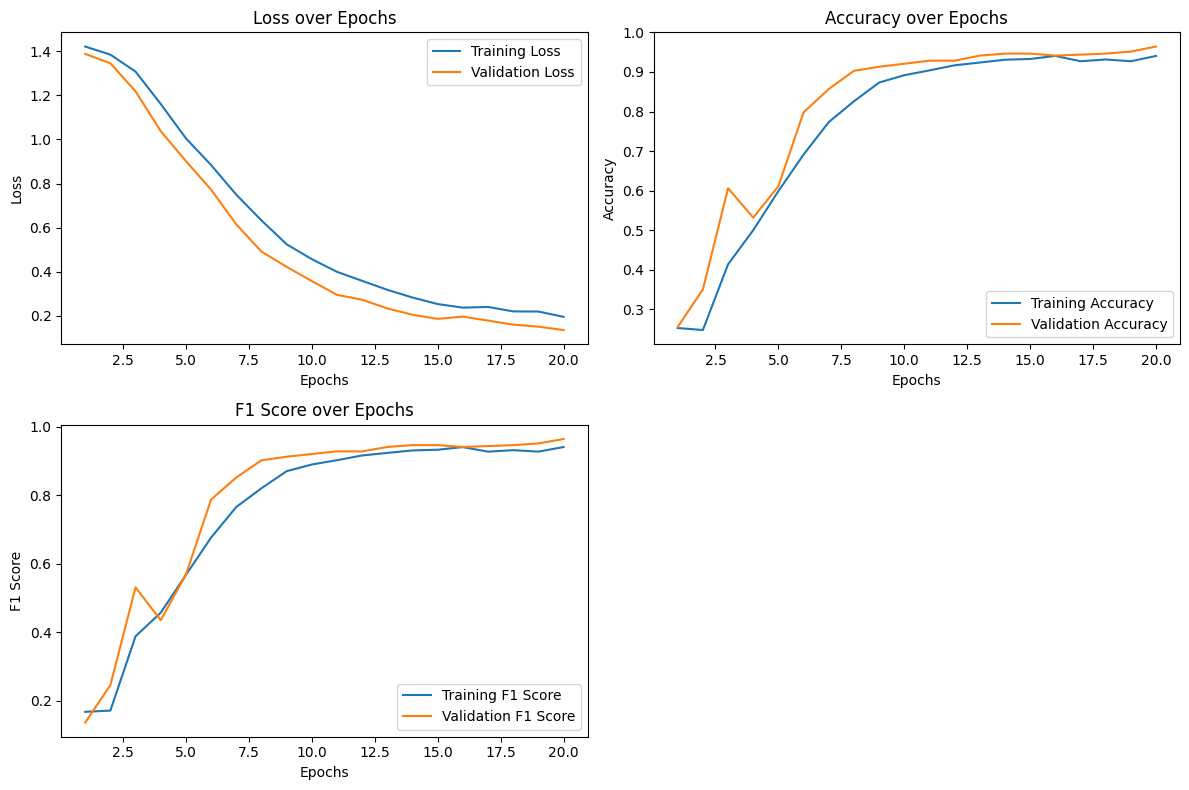

In [31]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_f1_scores, label='Training F1 Score')
plt.plot(epochs, val_f1_scores, label='Validation F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

# Sample predictions from Validation set

In [33]:
def predict_with_texts(model, dataloader, dataset, device):
    model.eval()
    predictions = []
    true_labels = []
    texts = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            input_ids = batch['input_ids'].to(device)
            padding_mask = batch['padding_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, padding_mask)
            _, predicted = torch.max(outputs, 1)

            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

            batch_texts = dataset.texts[i * dataloader.batch_size : min((i + 1) * dataloader.batch_size, len(dataset))]
            texts.extend(batch_texts)

    return true_labels, predictions, texts

true_labels, predictions, texts = predict_with_texts(model, validation_dataloader, validation_dataset, device)

for i in range(10):
    print(f"Text: {texts[i]}")
    print(f"True Class: {label_encoder.inverse_transform([true_labels[i]])[0]}")
    print(f"Predicted Class: {label_encoder.inverse_transform([predictions[i]])[0]}")
    print()

Text: राजश्व न्यायाधिकरणमा रिक्त पदहरूका कार्यालयका कर्मचारीहरू पुनरावेदन अदालत अदालतको क्षेत्र जिल्ला जिल्ला अदालतमा रिक्त राजपत्र अनड्रित प्रथम श्रणी त्राहेक कर्मचारीहरू कार्यरत कर्मचारीहरू नियमहरू प्रारम्भ हुँदाका बखत सेवामा कार्यरत राजपत्र अन्रित उपनियम जुनसुकै लेखिएको पूर्ति प्रतिशत
True Class: Policy
Predicted Class: Policy

Text: नेपाल सरकार गृह मन्त्रालय जिल्ला प्रशासन कार्यालय अर्घाखाँची नेपाली नागरिकताको प्रमाणपत्र नाप्रनं नाम सुष्मिता बस्नेत लिङ्ग पुरुष जन्म स्थान जिल्ला अर्घाखाँची गावि सन्धिखर्क नगरपालिका वडा स्थायी बासस्थान जिल्ला ताप्लेजुङ नपा मैवाखोला गाउँपालिका वडा जन्म मिति साल महिना गते बाबुको नाम सुस्मिता बस्नेत नाप्रनं ठेगाना ताप्लेजुङ नपा वंशज आमाको नाम सुकृति अधिकारी नाप्रनं ठेगाना अर्घाखाँची नपा वंशज प॒तिपत्नीको नामथर नाप्रनं ठेगाना
True Class: ID
Predicted Class: ID

Text: ग्र्ट उपनियम वमोजिम जम्मा रकम सम्वन्धित ठेकेदार आपूर्तिकर्ताले बुझाउनु करमा मिलान पाउनेछ कारोबार गराउनु विशेष व्यक्तिको वार्षिक कारोबार वस्तु ढुवानी साधन भाडा ढुवानी सेवाको हकमा पतच्रास रुपैया

# Save and Load Model

In [34]:
torch.save(model.state_dict(), 'nepali_text_classification_model.pth')

In [35]:
import json

with open('tokenizer_vocab.json', 'w', encoding='utf-8') as vocab_file:
    json.dump(custom_tokenizer.vocab, vocab_file, ensure_ascii=False, indent=4)

In [36]:
model.load_state_dict(torch.load('/content/nepali_text_classification_model.pth', weights_only=True))

<All keys matched successfully>

In [37]:
model.to(device)
model.eval()
class_names = label_encoder.classes_

def predict(text, tokenizer, model, max_length, device):
    model.eval()
    with torch.no_grad():
        encoded_input = tokenizer.encode(text, max_length)
        input_ids = torch.tensor(encoded_input, dtype=torch.long).unsqueeze(0).to(device)
        attention_mask = (input_ids != tokenizer.vocab['<PAD>']).long().to(device)

        outputs = model(input_ids, attention_mask)
        _, predicted_class = torch.max(outputs, 1)

        return predicted_class.item()

sample_text = "बल्खु त्रिभुवन विश्वविद्यालय विज्ञान प्रविधि अध्ययन संस्थान डीनको कार्यालय परीक्षा शाखा वल्खुद्वारा सेमेष्टर परीक्षा प्रणाली साल चैत्र महिनामा संचालन वर्षे स्नातक कम्प्यूटर विज्ञान सुचना प्रविधि विषय वर्ष शत्र समूहको नियमित शकत्रको अगाडिका समूहको आंशिक परीक्षाको परीक्षाफल विज्ञान प्रविधि अध्ययन संस्थान परीक्षा संचालक समितिको निर्णयानुसार प्रकाशित गरिएको परीक्षामा निम्नाकित कमांक परीक्षार्थीहरु उत्तीर्ण वर्षे स्नातक कम्प्यूटर विज्ञान सूचना प्रविधि वर्ष शत्र"
predicted_label = predict(sample_text, custom_tokenizer, model, max_length, device)
predicted_class_name = class_names[predicted_label]
print(f"Predicted class: {predicted_class_name}")

Predicted class: Education
